In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
bill_data = pd.read_csv("bill charge.csv")
bill_data.head()

,Date,Patient Name,Age,Bill Charge
0,1/1/2023,Bob,33,100.5
1,1/4/2023,Bob,24,250.0
2,1/7/2023,Bob,56,75.0
3,1/7/2023,Eve,40,300.0
4,1/9/2023,Charlie,40,150.5


In [15]:
print("Dataset Loaded Successfully")
display(bill_data.info())
display(bill_data.head())

Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          20 non-null     object 
 1   Patient Name  20 non-null     object 
 2   Age           20 non-null     int64  
 3   Bill Charge   20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


None

,Date,Patient Name,Age,Bill Charge
0,1/1/2023,Bob,33,100.5
1,1/4/2023,Bob,24,250.0
2,1/7/2023,Bob,56,75.0
3,1/7/2023,Eve,40,300.0
4,1/9/2023,Charlie,40,150.5


In [16]:
bill_data['Date'] = pd.to_datetime(bill_data['Date'])

bill_data['Year'] = bill_data['Date'].dt.year
bill_data['Month'] = bill_data['Date'].dt.month

bill_data_numeric = bill_data[['Date', 'Bill Charge', 'Year', 'Month']]

grouped = bill_data_numeric.groupby(['Year', 'Month'])['Bill Charge'].sum().reset_index()

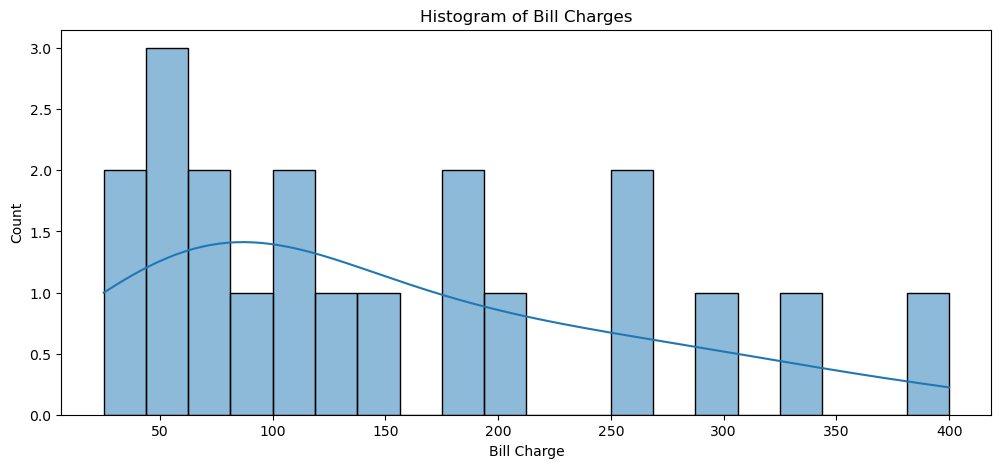

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(bill_data['Bill Charge'], bins=20, kde=True)
plt.title("Histogram of Bill Charges")
plt.show()

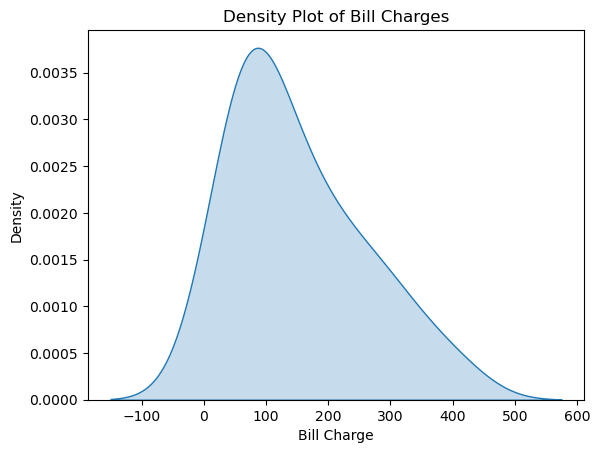

In [18]:
sns.kdeplot(bill_data['Bill Charge'], fill=True)
plt.title("Density Plot of Bill Charges")
plt.show()

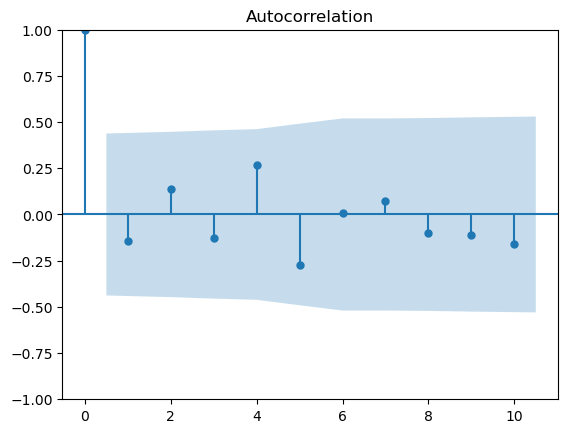

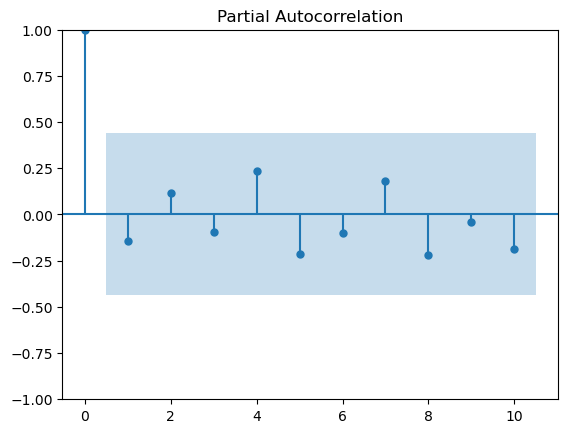

In [19]:
plot_acf(bill_data['Bill Charge'])
plt.show()

plot_pacf(bill_data['Bill Charge'])
plt.show()

In [20]:
bill_data['Rolling_Mean_3'] = bill_data['Bill Charge'].rolling(window=3).mean()
bill_data['Expanding_Mean'] = bill_data['Bill Charge'].expanding().mean()
bill_data.head()

,Date,Patient Name,Age,Bill Charge,Year,Month,Rolling_Mean_3,Expanding_Mean
0,2023-01-01,Bob,33,100.5,2023,1,NaN,100.500000
1,2023-01-04,Bob,24,250.0,2023,1,NaN,175.250000
2,2023-01-07,Bob,56,75.0,2023,1,141.833333,141.833333
3,2023-01-07,Eve,40,300.0,2023,1,208.333333,181.375000
4,2023-01-09,Charlie,40,150.5,2023,1,175.166667,175.200000


In [21]:
adf_result = adfuller(bill_data['Bill Charge'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -4.69980894165687
p-value: 8.422235044039989e-05


In [22]:
bill_data['Date'] = pd.to_datetime(bill_data['Date'])

bill_data.set_index('Date', inplace=True)

bill_data['Bill Charge'] = pd.to_numeric(bill_data['Bill Charge'], errors='coerce')
bill_data.dropna(subset=['Bill Charge'], inplace=True)


In [29]:
bill_data = bill_data.drop_duplicates(keep = 'first')
bill_data

,Patient Name,Age,Bill Charge,Year,Month,Rolling_Mean_3,Expanding_Mean
Date,,,,,,,
2023-01-01,Bob,33,100.5,2023,1,NaN,100.500000
2023-01-04,Bob,24,250.0,2023,1,NaN,175.250000
2023-01-07,Bob,56,75.0,2023,1,141.833333,141.833333
2023-01-07,Eve,40,300.0,2023,1,208.333333,181.375000
2023-01-09,Charlie,40,150.5,2023,1,175.166667,175.200000
2023-01-10,Charlie,24,200.0,2023,1,216.833333,179.333333
2023-01-11,Bob,40,175.0,2023,1,175.166667,178.714286
2023-01-11,Eve,40,400.0,2023,1,258.333333,206.375000
2023-01-11,Bob,40,120.0,2023,1,231.666667,196.777778
